In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import re

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

df = pd.read_csv(r'E:\Viraj\Personal\DataAnalyst_Project\archive\movies.csv')

In [16]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [31]:
for col in df.columns:
    dat_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(dat_missing*100)))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [16]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime       int64
dtype: object

In [32]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,R,Drama,2020,"October 23, 2020",3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,13266,Dow Jazz Films,90
7664,Dream Round,R,Comedy,2020,"February 7, 2020",4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,7000,13266,Cactus Blue Entertainment,90
7665,Saving Mbango,R,Drama,2020,"April 27, 2020",5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,13266,Embi Productions,90
7666,It's Just Us,R,Drama,2020,"October 1, 2020",5.7,29,James Randall,James Randall,Christina Roz,United States,15000,13266,Embi Productions,120


In [9]:
df.sort_values(by=['gross'], inplace= False, ascending= False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,533,5,0,2009,641,7.8,1100000,1155,1778,2334,55,237000000,2847246203,2253,162
7445,535,5,0,2019,187,8.4,903000,162,743,2241,55,356000000,2797501328,1606,181
3045,6896,5,6,1997,647,7.8,1100000,1155,1778,1595,55,200000000,2201647264,2253,194
6663,5144,5,0,2015,643,7.8,876000,1125,2550,524,55,245000000,2069521700,1540,138
7244,536,5,0,2018,195,8.4,897000,162,743,2241,55,321000000,2048359754,1606,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,3360,6,4,2000,1013,6.5,5200,730,1123,2319,54,10000000,1400,477,103
7625,6720,3,4,2019,1040,5.7,320,2546,2565,1915,55,1200000,790,2308,104
7580,4664,3,5,2019,1646,5.2,735,1445,2203,2278,55,20000000,682,1992,93
2417,3406,4,6,1993,108,7.3,5100,33,1718,2563,27,11900000,596,796,134


In [28]:
pd.set_option('display.max_rows', None)

Text(0, 0.5, 'Gross Earning')

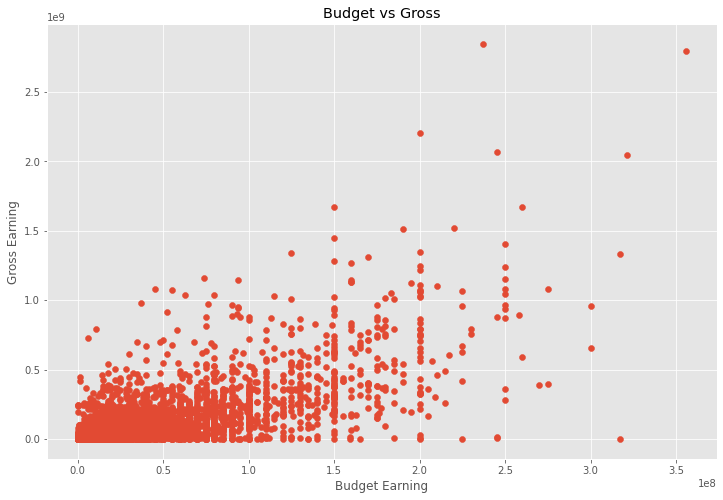

In [47]:
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross')
plt.xlabel('Budget Earning')
plt.ylabel('Gross Earning')

<AxesSubplot:xlabel='budget', ylabel='gross'>

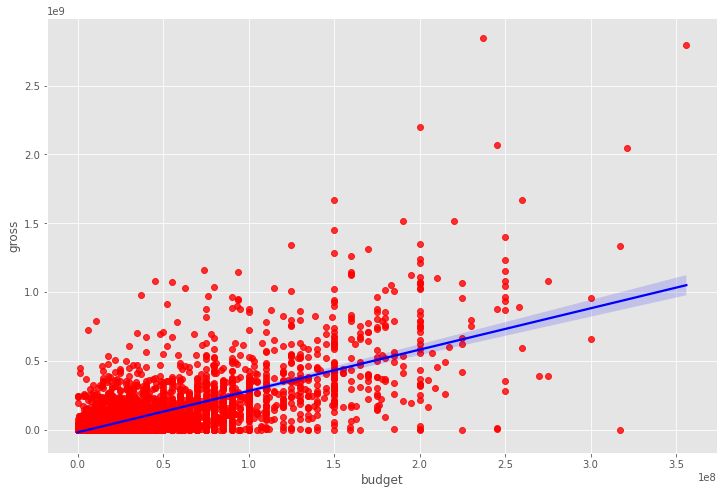

In [49]:
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"Blue"})

<AxesSubplot:xlabel='score', ylabel='gross'>

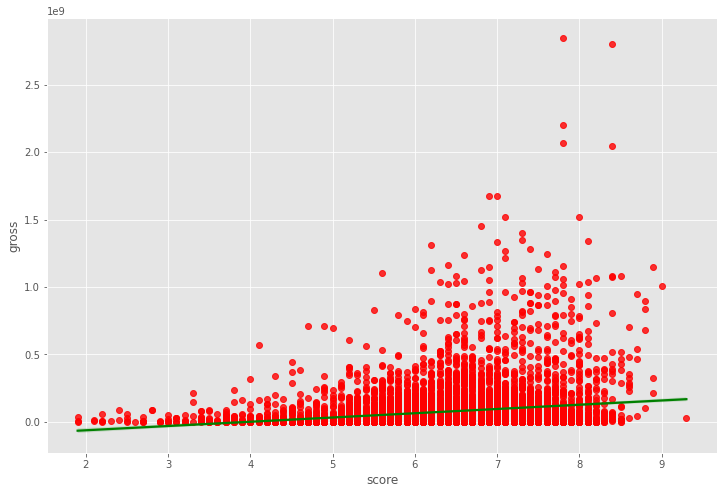

In [51]:
sns.regplot(x="score", y="gross", data=df, scatter_kws={"color":"red"}, line_kws={"color":"Green"})

In [10]:
# Correlation Matrix between all numeric columns

df.corr(method ='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.011776,0.016355,0.011453,-0.011205,0.017237,0.013038,0.009079,0.009033,0.006820,-0.010127,0.022882,0.006747,0.009980,0.010448
rating,-0.011776,1.000000,0.116837,0.025051,0.021921,0.011389,0.016909,0.018842,-0.004470,0.007728,0.036900,-0.117510,-0.126848,-0.075280,0.068470
genre,0.016355,0.116837,1.000000,-0.081261,0.021540,0.027832,-0.145296,-0.015258,0.006434,-0.004696,-0.036506,-0.308228,-0.232776,-0.070347,-0.052806
year,0.011453,0.025051,-0.081261,1.000000,0.009688,0.098098,0.222427,-0.020795,-0.008240,-0.027871,-0.069859,0.334314,0.261550,-0.009918,0.120694
released,-0.011205,0.021921,0.021540,0.009688,1.000000,0.041712,0.022238,0.000295,-0.001339,0.015571,-0.015082,0.016000,0.006584,-0.003608,0.003788
score,0.017237,0.011389,0.027832,0.098098,0.041712,1.000000,0.409064,0.009509,0.019214,-0.000772,-0.134361,0.080708,0.186264,-0.001013,0.399116
votes,0.013038,0.016909,-0.145296,0.222427,0.022238,0.409064,1.000000,0.000349,0.000993,-0.019364,0.073612,0.449422,0.632341,0.132588,0.309140
director,0.009079,0.018842,-0.015258,-0.020795,0.000295,0.009509,0.000349,1.000000,0.299463,0.039834,0.017683,0.002167,-0.014536,0.004536,0.017537
writer,0.009033,-0.004470,0.006434,-0.008240,-0.001339,0.019214,0.000993,0.299463,1.000000,0.027740,0.014480,-0.020821,-0.022491,0.004274,-0.003506
star,0.006820,0.007728,-0.004696,-0.027871,0.015571,-0.000772,-0.019364,0.039834,0.027740,1.000000,-0.014519,-0.019806,-0.000601,0.010243,0.008921


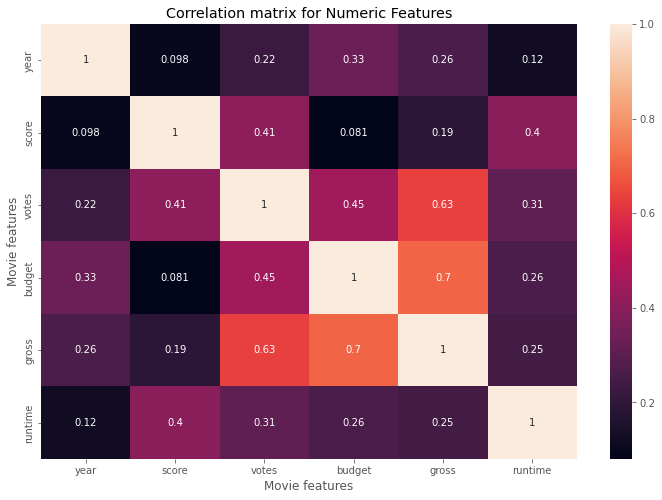

In [52]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [17]:
df.sort_values(by=['gross'], inplace= False, ascending= False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,"December 19, 1997",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001",6.5,5200,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,10000000,1400,British Broadcasting Corporation (BBC),103
7625,The Untold Story,Not Rated,Comedy,2019,"January 11, 2019",5.7,320,Shane Stanley,Lee Stanley,Miko Hughes,United States,1200000,790,Visual Arts Entertainment,104
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020",5.2,735,John Swab,John Swab,Ron Perlman,United States,20000000,682,Roxwell Films,93
2417,Madadayo,PG,Drama,1993,"April 17, 1993",7.3,5100,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134


In [21]:
df_numerizer = df
for col_name in df_numerizer.columns:
    if(df_numerizer[col_name].dtype =='object'):
        df_numerizer[col_name] = df_numerizer[col_name].astype('category')
        df_numerizer[col_name] = df_numerizer[col_name].cat.codes
    
df_numerizer.sort_values(by=['gross'], inplace= False, ascending= False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,533,5,0,2009,641,7.8,1100000,1155,1778,2334,55,237000000,2847246203,2253,162
7445,535,5,0,2019,187,8.4,903000,162,743,2241,55,356000000,2797501328,1606,181
3045,6896,5,6,1997,647,7.8,1100000,1155,1778,1595,55,200000000,2201647264,2253,194
6663,5144,5,0,2015,643,7.8,876000,1125,2550,524,55,245000000,2069521700,1540,138
7244,536,5,0,2018,195,8.4,897000,162,743,2241,55,321000000,2048359754,1606,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,3360,6,4,2000,1013,6.5,5200,730,1123,2319,54,10000000,1400,477,103
7625,6720,3,4,2019,1040,5.7,320,2546,2565,1915,55,1200000,790,2308,104
7580,4664,3,5,2019,1646,5.2,735,1445,2203,2278,55,20000000,682,1992,93
2417,3406,4,6,1993,108,7.3,5100,33,1718,2563,27,11900000,596,796,134


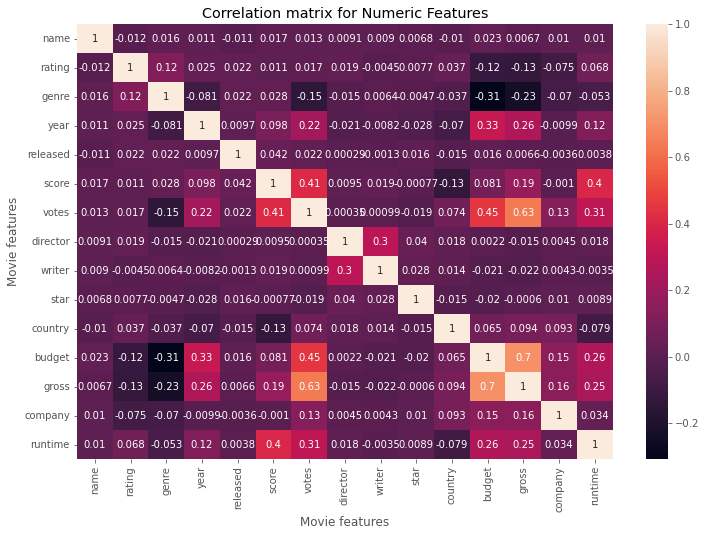

In [24]:
correlation_matrix = df_numerizer.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [25]:
df_numerizer.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.011776,0.016355,0.011453,-0.011205,0.017237,0.013038,0.009079,0.009033,0.006820,-0.010127,0.022882,0.006747,0.009980,0.010448
rating,-0.011776,1.000000,0.116837,0.025051,0.021921,0.011389,0.016909,0.018842,-0.004470,0.007728,0.036900,-0.117510,-0.126848,-0.075280,0.068470
genre,0.016355,0.116837,1.000000,-0.081261,0.021540,0.027832,-0.145296,-0.015258,0.006434,-0.004696,-0.036506,-0.308228,-0.232776,-0.070347,-0.052806
year,0.011453,0.025051,-0.081261,1.000000,0.009688,0.098098,0.222427,-0.020795,-0.008240,-0.027871,-0.069859,0.334314,0.261550,-0.009918,0.120694
released,-0.011205,0.021921,0.021540,0.009688,1.000000,0.041712,0.022238,0.000295,-0.001339,0.015571,-0.015082,0.016000,0.006584,-0.003608,0.003788
score,0.017237,0.011389,0.027832,0.098098,0.041712,1.000000,0.409064,0.009509,0.019214,-0.000772,-0.134361,0.080708,0.186264,-0.001013,0.399116
votes,0.013038,0.016909,-0.145296,0.222427,0.022238,0.409064,1.000000,0.000349,0.000993,-0.019364,0.073612,0.449422,0.632341,0.132588,0.309140
director,0.009079,0.018842,-0.015258,-0.020795,0.000295,0.009509,0.000349,1.000000,0.299463,0.039834,0.017683,0.002167,-0.014536,0.004536,0.017537
writer,0.009033,-0.004470,0.006434,-0.008240,-0.001339,0.019214,0.000993,0.299463,1.000000,0.027740,0.014480,-0.020821,-0.022491,0.004274,-0.003506
star,0.006820,0.007728,-0.004696,-0.027871,0.015571,-0.000772,-0.019364,0.039834,0.027740,1.000000,-0.014519,-0.019806,-0.000601,0.010243,0.008921


In [29]:
correlation_mat = df_numerizer.corr()
corr_pairs = correlation_mat.unstack()

corr_pairs

name      name        1.000000
          rating     -0.011776
          genre       0.016355
          year        0.011453
          released   -0.011205
          score       0.017237
          votes       0.013038
          director    0.009079
          writer      0.009033
          star        0.006820
          country    -0.010127
          budget      0.022882
          gross       0.006747
          company     0.009980
          runtime     0.010448
rating    name       -0.011776
          rating      1.000000
          genre       0.116837
          year        0.025051
          released    0.021921
          score       0.011389
          votes       0.016909
          director    0.018842
          writer     -0.004470
          star        0.007728
          country     0.036900
          budget     -0.117510
          gross      -0.126848
          company    -0.075280
          runtime     0.068470
genre     name        0.016355
          rating      0.116837
        

In [30]:
sorted_pairs = corr_pairs.sort_values()

print(sorted_pairs)

genre     budget     -0.308228
budget    genre      -0.308228
gross     genre      -0.232776
genre     gross      -0.232776
          votes      -0.145296
votes     genre      -0.145296
country   score      -0.134361
score     country    -0.134361
gross     rating     -0.126848
rating    gross      -0.126848
          budget     -0.117510
budget    rating     -0.117510
genre     year       -0.081261
year      genre      -0.081261
runtime   country    -0.078803
country   runtime    -0.078803
company   rating     -0.075280
rating    company    -0.075280
company   genre      -0.070347
genre     company    -0.070347
year      country    -0.069859
country   year       -0.069859
runtime   genre      -0.052806
genre     runtime    -0.052806
          country    -0.036506
country   genre      -0.036506
star      year       -0.027871
year      star       -0.027871
writer    gross      -0.022491
gross     writer     -0.022491
writer    budget     -0.020821
budget    writer     -0.020821
year    

In [31]:
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

gross     votes       0.632341
votes     gross       0.632341
gross     budget      0.701819
budget    gross       0.701819
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64


In [32]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
2319    56503220422
2281    52516382502
731     43008941346
1812    40498350702
2253    40257053857
2316    36327887792
1713    19883797684
1606    15065592411
887     11873612858
2232    11795832638
889     11635441081
1637     9230716116
2147     8373718838
1856     7886344526
1109     7859188884
Name: gross, dtype: int64